In [135]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import math

#Importing data
number=
file = '../airline_Train_'+str(number)+'.csv'
file2 = '../airline_Test_'+str(number)+'.csv'

train = pd.read_csv(file)
train.columns = ['ds','Count']
train['ds'] = pd.to_datetime(train['ds'])
print(train.head())

test = pd.read_csv(file2)
test.columns = ['ds','Count']
test['ds'] = pd.to_datetime(test['ds'])
test.tail()

FileNotFoundError: [Errno 2] No such file or directory: '../airline_Train_6.csv'

In [57]:

#plt.figure(figsize=(16,8))
#plt.plot(train.ds,train['Count'], label='Train')
#plt.plot(test.ds,test['Count'], label='Test')
#plt.plot(test.ds,y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
#plt.legend(loc='best')
#plt.show()

0    80040.25
1    80040.25
2    80040.25
3    80040.25
Name: moving_avg_forecast, dtype: float64

### Ergebnisse erfassen 

In [134]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(12).mean().iloc[-1]

set = 'Set'+str(number)

y_true = test.Count
y_pred = y_hat_avg.moving_avg_forecast

# MAE setzen 

df_results['MAE'][set] = round(mean_absolute_error(y_true, y_pred),0)

#RMSE setzen
mse=mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)
df_results['RMSE'][set] = round(rmse)

#MAPE setzen
df_results['MAPE'][set]=round(mean_absolute_percentage_error(y_true, y_pred),4)

df_results.head(10)

C:\Users\strub\AppData\Local\Temp\ipykernel_1500\3993809977.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['MAE'][set] = round(mean_absolute_error(y_true, y_pred),0)
C:\Users\strub\AppData\Local\Temp\ipykernel_1500\3993809977.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['RMSE'][set] = round(rmse)
C:\Users\strub\AppData\Local\Temp\ipykernel_1500\3993809977.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,MAE,RMSE,MAPE
Set1,23,26,0.0539
Set2,44,54,0.0879
Set3,115,130,0.1963
Set4,96,117,0.162
Set5,38,46,0.0884
Set6,0,NaN,NaN
Set7,0,NaN,NaN
Set8,0,NaN,NaN
Set9,0,NaN,NaN
Set10,0,NaN,NaN


In [136]:
df_results.to_csv('Errors_MovAve_Airline.csv',index=False)

In [104]:
df_results = pd.DataFrame(columns = ['MAE', 'RMSE', 'MAPE'])
df_results['MAE'] = [0,0,0,0,0,0,0,0,0,0]
df_results.index = ['Set1', 'Set2', 'Set3', 'Set4', 'Set5','Set6', 'Set7', 'Set8', 'Set9', 'Set10']
df_results.head()

,MAE,RMSE,MAPE
Set1,0,NaN,NaN
Set2,0,NaN,NaN
Set3,0,NaN,NaN
Set4,0,NaN,NaN
Set5,0,NaN,NaN


## NAIVE METHOD

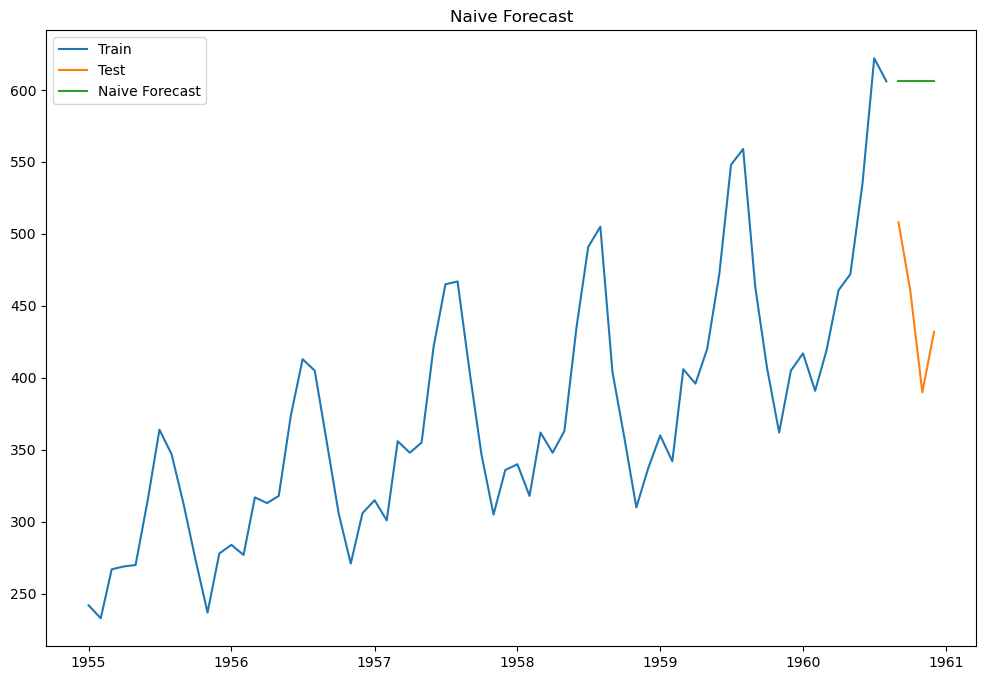

,ds,Count,naive
0,1960-09-01,508,606
1,1960-10-01,461,606
2,1960-11-01,390,606
3,1960-12-01,432,606


In [70]:
dd = np.asarray(train.Count)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.ds, train['Count'], label='Train')
plt.plot(test.ds,test['Count'], label='Test')
plt.plot(y_hat.ds,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()
y_hat

In [72]:
y_true1 = test.Count
y_pred1 = y_hat.naive
mean_absolute_percentage_error(y_true1, y_pred1)

0.36601773500258905